# DD2367 - Programing Assignment III: Quantum Arithmetics, QFT & Quantum walk #

Authors: Scott McHaffie, Jai Iyer, Venkatesh Elayaraja

In [132]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from circleNotationClass import QubitSystem
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector

# Function to get statevector from Aer simulator
def statevector_from_aer(circ: QuantumCircuit) -> np.ndarray:
    backend = Aer.get_backend("aer_simulator_statevector")
    tqc = transpile(circ, backend)
    result = backend.run(tqc).result()
    return np.asarray(result.get_statevector(tqc), dtype=np.complex128)


DTYPE = np.complex128

# **Task 1:** Quantum Arithmetics


This exercise aims to implement 3-qubit increment and decrement operators, =+ -=, using the IBM Qiskit framework and its Aer quantum computer simulator.

---

## **Task 1.1:** Increment and Decrement Operators

1. Prepare a superposition of quantum states using HAD QPU instructions. You can decide freely which superposition. This will determine the concurrent increment or decrement operator.

In [133]:
# Initialise 3-qubit register
qc_id = QuantumCircuit(3)

# Create superposition  of |0> and |4> states
qc_id.h(2)


2. Plot the quantum states using the circle notation. 

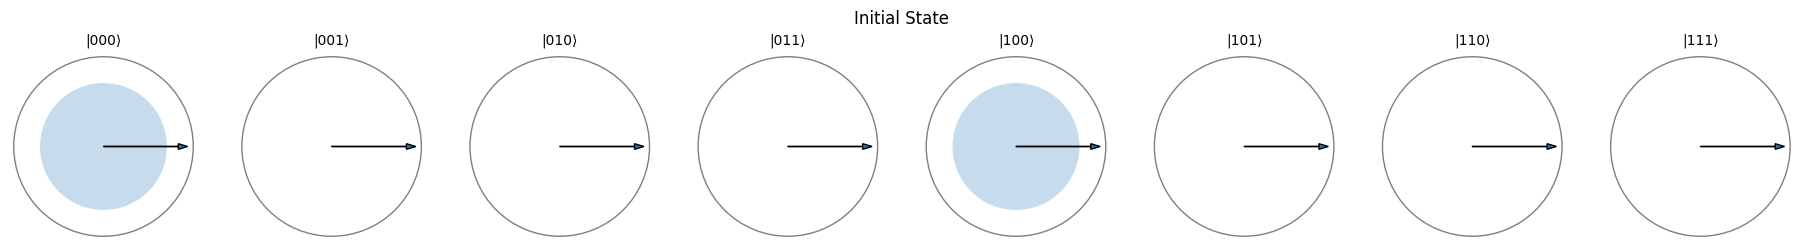

In [134]:
# Save copy of the circuit and get statevector
qc_init = qc_id.copy()
qc_init.save_statevector()
qc_id_state = statevector_from_aer(qc_init)

# Plot statevector in circle notation
QubitSystem(qc_id_state, label='Initial State').viz_circle()

3. Perform an increment operation (by 1) +=

In [135]:
## INCREMENT CIRCUIT ##

# Step 1: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_id.ccx(0, 1, 2)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_id.cx(0, 1)

# Step 3: Apply X gate | Target Qubit: 0
qc_id.x(0)

4. Plot the quantum states using the circle notation. 

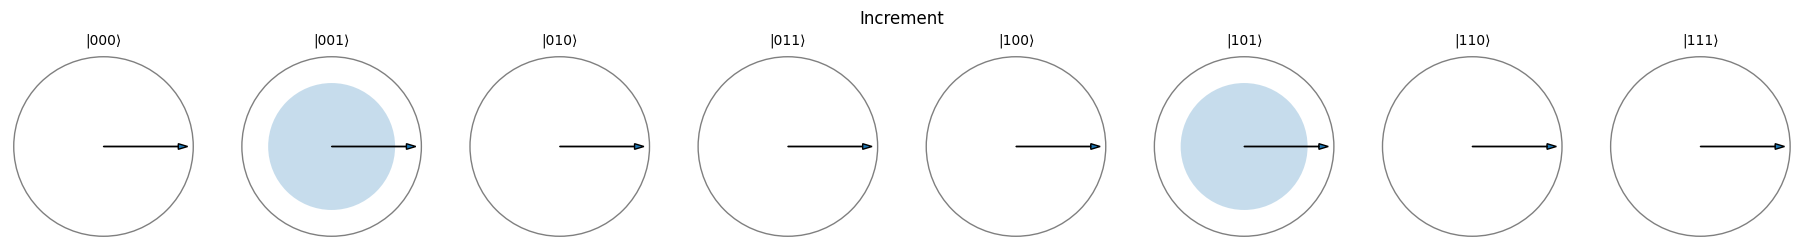

In [136]:
# Save copy of the circuit and get statevector
qc_increment = qc_id.copy()
qc_increment.save_statevector()
qc_id_state = statevector_from_aer(qc_increment)

# Plot statevector in circle notation
QubitSystem(qc_id_state, label='Increment').viz_circle()

5. Perform a decrement operation (by 1) -=

In [137]:
## DECREMENT CIRCUIT ##

# Step 1: Apply X gate | Target Qubit: 0
qc_id.x(0)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_id.cx(0, 1)

# Step 3: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_id.ccx(0, 1, 2)

6. Plot the quantum states using the circle notation. 

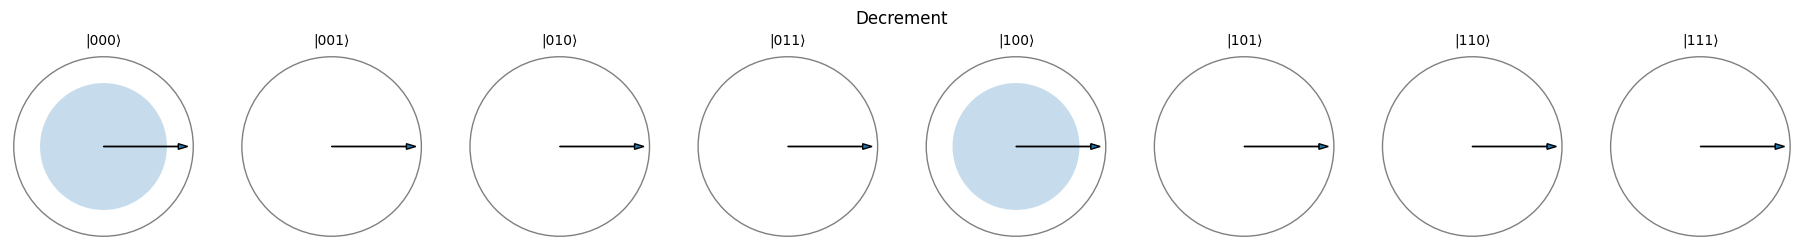

In [138]:
# Save copy of the circuit and get statevector
qc_decrement = qc_id.copy()
qc_decrement.save_statevector()
qc_id_state = statevector_from_aer(qc_decrement)

# Plot statevector in circle notation
QubitSystem(qc_id_state, label='Decrement').viz_circle()

## **Task 1.2** - Overflow & Underflow / Negative Numbers

---

**1.** What happens if we have an overflow (for the increment) or underflow (for the decrement)? Show the results of the overflow and underflow with an experiment.

### **Increment Overflow**. 
We demonstrate the result of *increment overflow* on the 3-qubit register using the **top state** $\ket {7} = \ket {111}$, and applying 1 increment on the state.

- Step 1: Initialize 3-qubit register with state $\ket {111}$

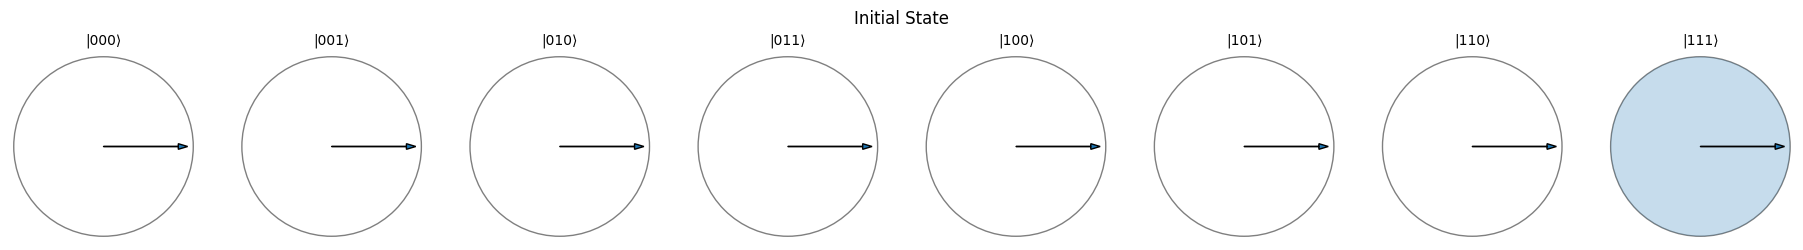

In [139]:
# Initialise 3-qubit register to demonstratre increment overflow
qc_inc_over = QuantumCircuit(3)

# Initialise to |7> state
qc_inc_over.x([0, 1, 2])

# Plot initial statevector in circle notation
qc_inc_over_init = qc_inc_over.copy()
qc_inc_over_init.save_statevector()
qc_inc_over_state = statevector_from_aer(qc_inc_over_init)
QubitSystem(qc_inc_over_state, label='Initial State').viz_circle()

- Step 2: Increment state by $+1$

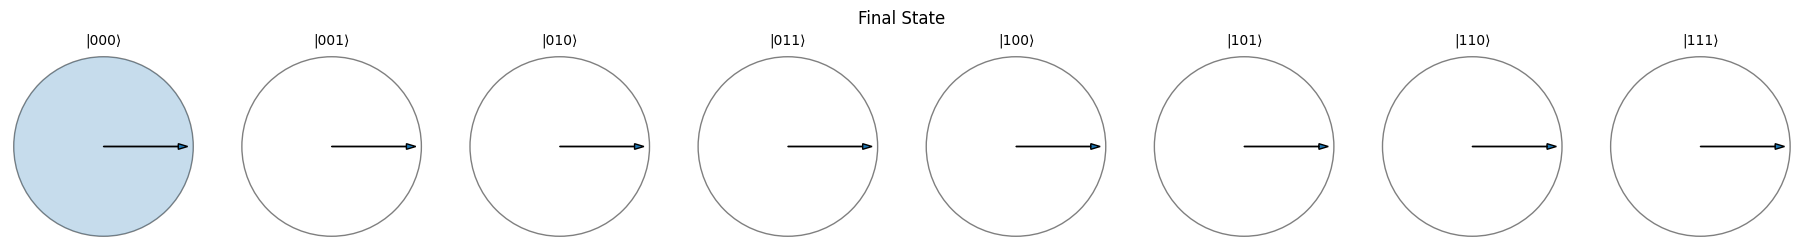

In [140]:
## INCREMENT CIRCUIT ##

# Step 1: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_inc_over.ccx(0, 1, 2)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_inc_over.cx(0, 1)

# Step 3: Apply X gate | Target Qubit: 0
qc_inc_over.x(0)

# Plot statevector in circle notation
qc_inc_over_final = qc_inc_over.copy()
qc_inc_over_final.save_statevector()
qc_inc_over_state = statevector_from_aer(qc_inc_over_final)
QubitSystem(qc_inc_over_state, label='Final State').viz_circle()

**Increment Circuit Diagram**

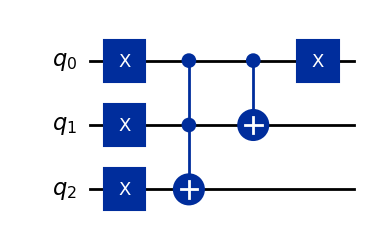

In [141]:
# Plot circuit
qc_inc_over.draw(output='mpl')

**Remarks.** Applying the increment circuit on the top state $\ket {111}$ cycles the system back to the bottom state $\ket {000}$. The increment circuit on the 3-qubit register effectively acts as **addition modulo 8**, which cycles through the computational basis states in the forward sense ($+1$ per increment).

### **Decrement Underflow**. 
From the above result, we can conclude that decrement underflow results in **cycling backwards** through the computational basis states. This is because the decrement circuit is simply the **inverse operation** of the increment circuit. We demonstrate this result by applying the decrement circuit to the bottom state $\ket {000}$.

- Step 1: Initialize 3-qubit register with state $\ket {000}$

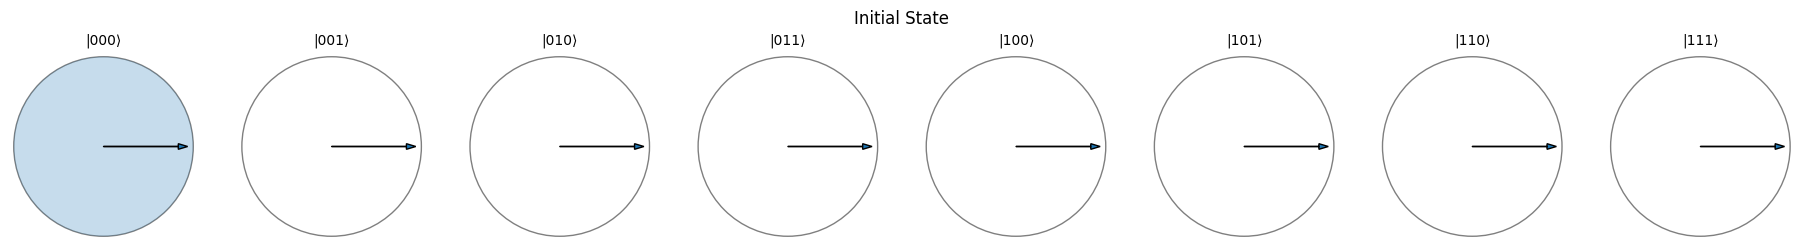

In [142]:
# Initialise 3-qubit register to demonstrate increment overflow
qc_dec_under = QuantumCircuit(3)

# Plot initial statevector in circle notation
qc_dec_under_init = qc_dec_under.copy()
qc_dec_under_init.save_statevector()
qc_dec_under_state = statevector_from_aer(qc_dec_under_init)
QubitSystem(qc_inc_over_state, label='Initial State').viz_circle()

- Step 2: Decrement state by $-1$

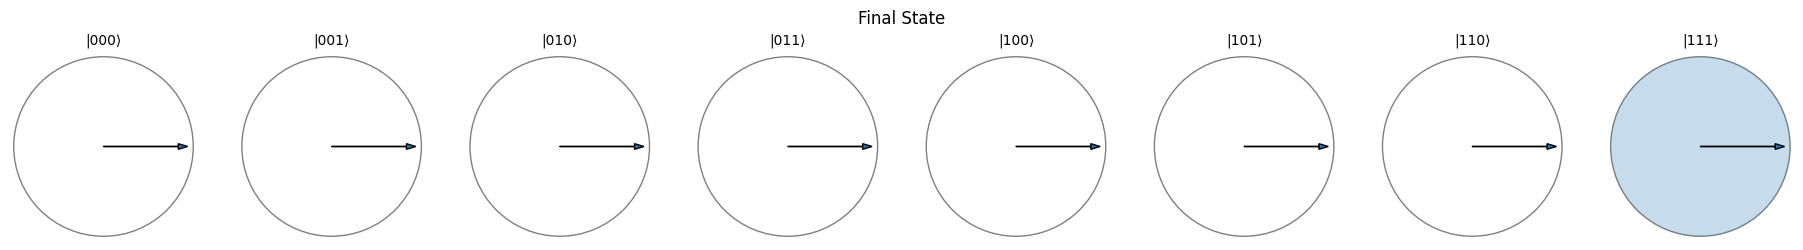

In [143]:
## DECREMENT CIRCUIT ##

# Step 1: Apply X gate | Target Qubit: 0
qc_dec_under.x(0)

# Step 2: Apply CNOT | Control Qubits: 0 | Target Qubit: 1
qc_dec_under.cx(0, 1)

# Step 3: Apply CCNOT | Control Qubits: 0, 1 | Target Qubit: 2
qc_dec_under.ccx(0, 1, 2)

# Plot final statevector in circle notation
qc_dec_under_final = qc_dec_under.copy()
qc_dec_under_final.save_statevector()
qc_dec_under_state = statevector_from_aer(qc_dec_under_final)
QubitSystem(qc_dec_under_state, label='Final State').viz_circle()

**Decrement Circuit Diagram**

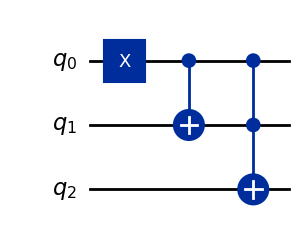

In [144]:
# Plot circuit
qc_dec_under.draw(output='mpl')

**Remarks.** The decrement circuit applied to the initial state $\ket {000}$ results in the final state $\ket {111}$, as predicted. Hence, we conclude that decrement underflow results in **cycling backwards through the computational basis states**. 

**2.** Do increment and decrement operations also work with negative integer numbers? Motivate with an example.

**Remarks.** Yes, the increment and decrement operations also work with negative integers encoded using the **Two's Complement Encoding**. We can see this through the results of task 1.1, by *re-interpreting* the 3-qubit computational basis states as corresponding to the integers $\{-4, \dots, 3\}$ as:

$$  
    \begin{align*}
        \ket {000} &\rightarrow 0 \\
        \ket {001} &\rightarrow 1 \\
        \ket {010} &\rightarrow 2 \\
        \ket {011} &\rightarrow 3 \\
        \ket {100} &\rightarrow -4 \\
        \ket {101} &\rightarrow -3 \\
        \ket {110} &\rightarrow -2 \\
        \ket {111} &\rightarrow -1 \\
    \end{align*}
$$

In this encoding, the increment circuit results in cycling through the integers in the **forward sense** as:

$$
    -4 \rightarrow -3 \rightarrow \dots \rightarrow +3 \rightarrow -4
$$

Consequently, the decrement circuit results in cycling through the integers in the **backward sense** as:

$$
    3 \rightarrow 2 \rightarrow \dots \rightarrow -4 \rightarrow +3
$$

---


# **Task 2:** Quantum Fourier Transform

---


# **Task 2.1** $-$ QFT and Preparation Circuit

In [145]:
from qiskit.visualization import circuit_drawer
from qiskit.utils.optionals import HAS_MATPLOTLIB
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Create a custom style
custom_style = {
    "fig_width": 10,  # Set desired width in inches
    "fig_height": 6,  # Set desired height in inches
    "dpi": 300        # Set desired resolution
}




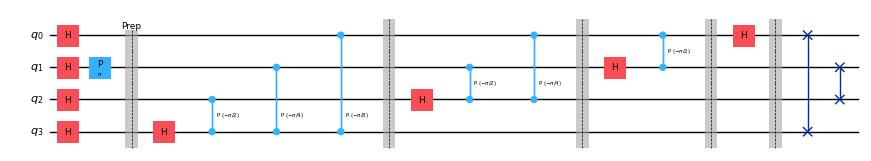

In [146]:
qc_id = QuantumCircuit(3, name="R")

qc_qft = QuantumCircuit(4, name="QFT")

# prep signal
qc_qft.h([0, 1, 2, 3])
qc_qft.p(np.pi, 1)
qc_signal = qc_qft.copy()
qc_qft.barrier([0,1,2,3], label="Prep")

# QFT
qc_qft.h(3)
qc_qft.cp(-np.pi/2, 2, 3)
qc_qft.cp(-np.pi/4, 1, 3)
qc_qft.cp(-np.pi/8, 0, 3)
qc_qft.barrier([0,1,2,3])

qc_qft.h(2)
qc_qft.cp(-np.pi/2, 1, 2)
qc_qft.cp(-np.pi/4, 0, 2)
qc_qft.barrier([0,1,2,3])

qc_qft.h(1)
qc_qft.cp(-np.pi/2, 0, 1)
qc_qft.barrier([0,1,2,3])

qc_qft.h(0)
qc_qft.barrier([0,1,2,3])

qc_qft.swap(0, 3)
qc_qft.swap(1, 2)
# qc_qft.barrier([0,1,2,3], label="QFT")

qc_qft.draw(output="mpl", scale=0.5)


[ 0.25+0.000000e+00j  0.25+0.000000e+00j -0.25-3.061617e-17j
 -0.25-3.061617e-17j  0.25+0.000000e+00j  0.25+0.000000e+00j
 -0.25-3.061617e-17j -0.25-3.061617e-17j  0.25+0.000000e+00j
  0.25+0.000000e+00j -0.25-3.061617e-17j -0.25-3.061617e-17j
  0.25+0.000000e+00j  0.25+0.000000e+00j -0.25-3.061617e-17j
 -0.25-3.061617e-17j]


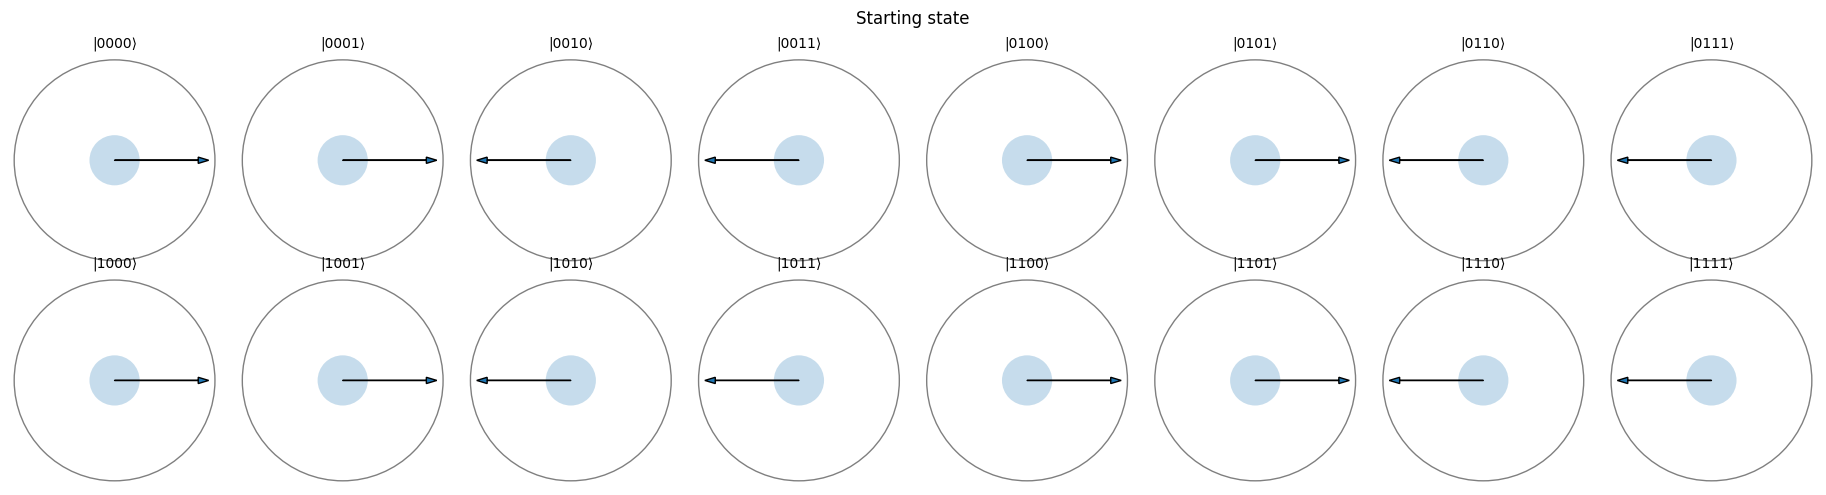

In [147]:
qc_signal.save_statevector()
signal_sv = statevector_from_aer(qc_signal)
print (signal_sv)
QubitSystem(signal_sv, label="Starting state").viz_circle()

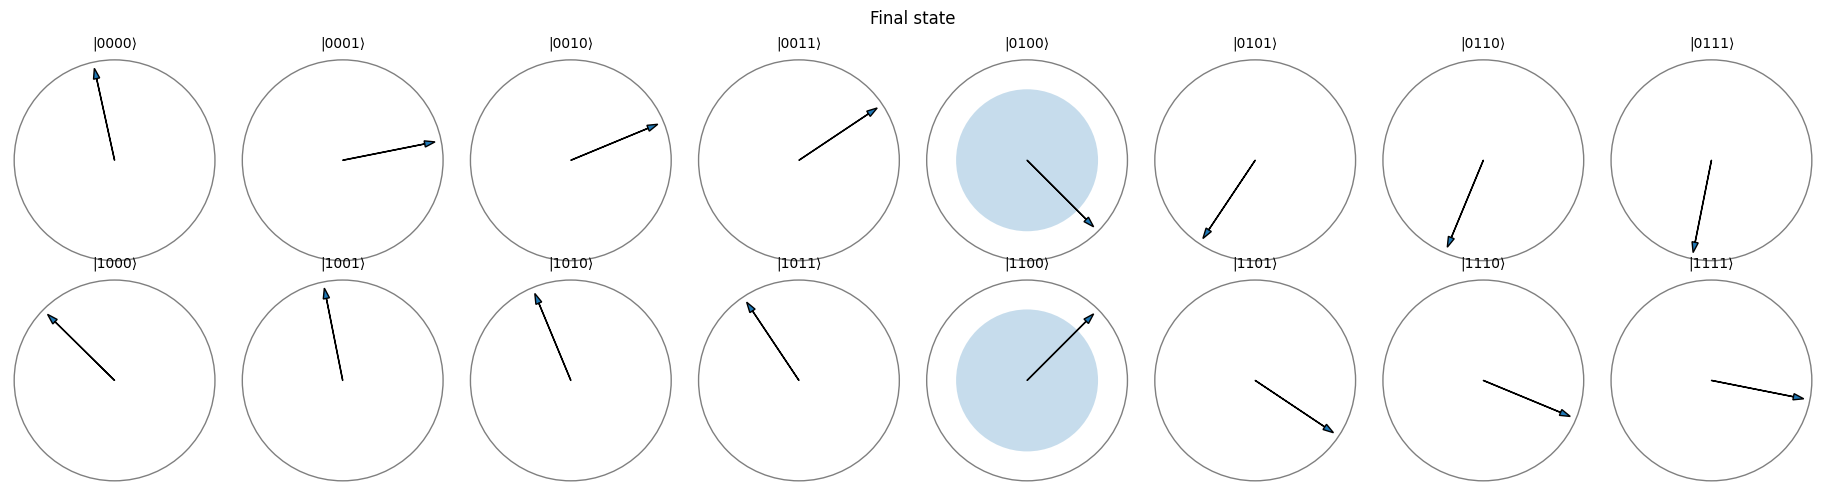

In [148]:
qft_copy = qc_qft.copy()
qft_sv = Statevector(qft_copy)

# Reverse the statevector 
# qft_statevector = Statevector(qft_sv)
# qft_sv_reordered = qft_statevector.reverse_qargs()

# print (qft_sv_reordered)
QubitSystem(qft_sv, label="Final state").viz_circle()

[ 0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25 -0.25
  0.25  0.25 -0.25 -0.25]


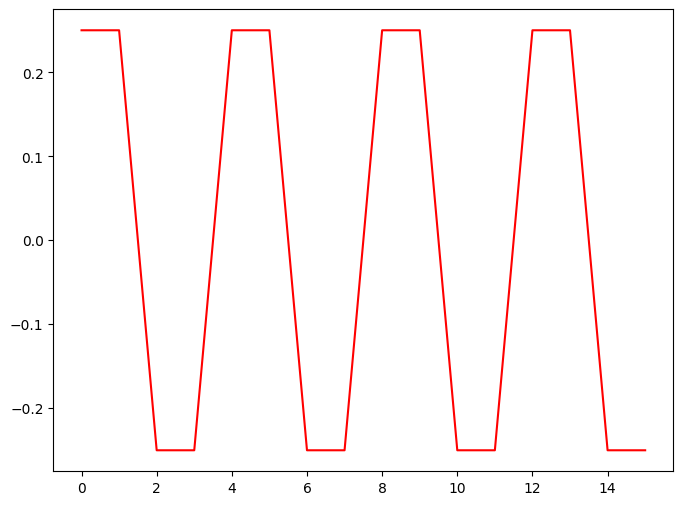

[2.44929360e-16 3.20112637e-16 2.90176727e-16 6.84118960e-16
 2.82842712e+00 4.51339148e-16 4.57489902e-16 2.24571934e-15
 2.66453526e-15 2.06648969e-15 1.47623309e-15 3.49903527e-15
 2.82842712e+00 2.63108987e-15 9.64683051e-16 2.68339438e-15]


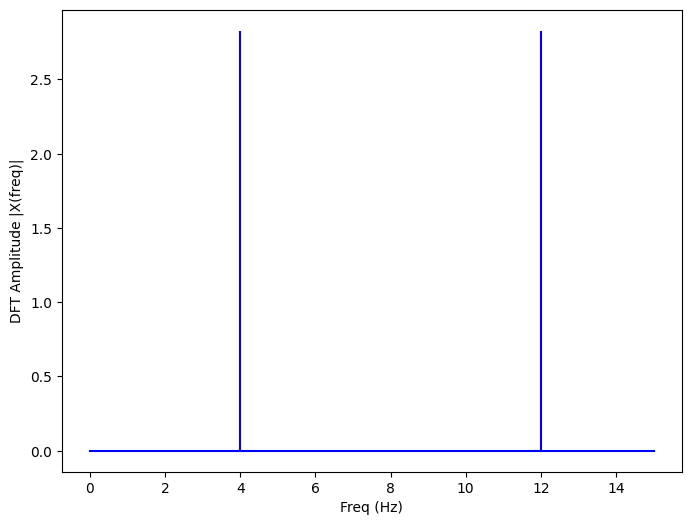

In [149]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

# sampling rate
sr = 16
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

print (np.real(signal_sv))

plt.figure(figsize = (8, 6))
plt.plot(np.arange(16), np.real(signal_sv), 'r')
plt.show()

# print (np.arange(16))

X = DFT(signal_sv)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

print (abs(X))
plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()


[0.-2.4492936e-16j 0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j
 2.-2.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j
 0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j
 2.+2.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j 0.+0.0000000e+00j]


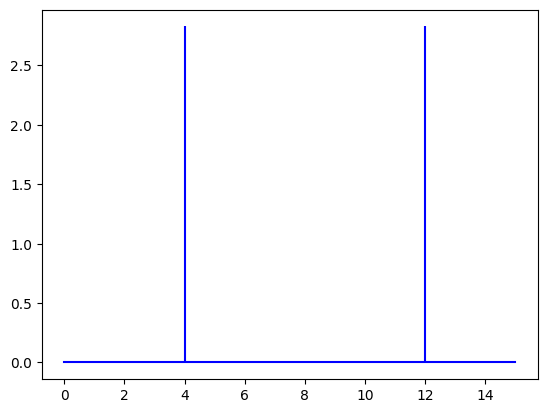

In [150]:
# for fft using np 
fft_result = np.fft.fft(signal_sv)
print (fft_result)

plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.show()